In [2]:
import pandas as pd
import geopandas as gpd
# Using forked skmob package
# https://github.com/cadentj/scikit-mobility
import skmob
from skmob.tessellation import tilers
from shapely import wkt, MultiPolygon
import pickle as pkl
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
days = [str(day).zfill(2) for day in range(2,32)]  

aggregated_fdf = -1
running_shapes = [] 
aggregated_shapes = []

for _, day in tqdm(enumerate(days)):
    date = ('07', day)
    
    date_fdf = pkl.load(open(f'./pkl_data/07/data_{date[0]}_{date[1]}.pkl', 'rb'))
    running_shapes.append(date_fdf.shape)

    if type(aggregated_fdf) == type(-1):
        aggregated_fdf = date_fdf
    else:
        combined_df = pd.concat([aggregated_fdf, date_fdf], ignore_index=True)
        aggregated_fdf = combined_df.groupby(['origin', 'destination']).sum().reset_index()

    aggregated_shapes.append(aggregated_fdf.shape)



30it [00:20,  1.44it/s]


In [7]:
aggregated_shapes = [i for i, _ in aggregated_shapes]
running_shapes = [i for i, _ in running_shapes]

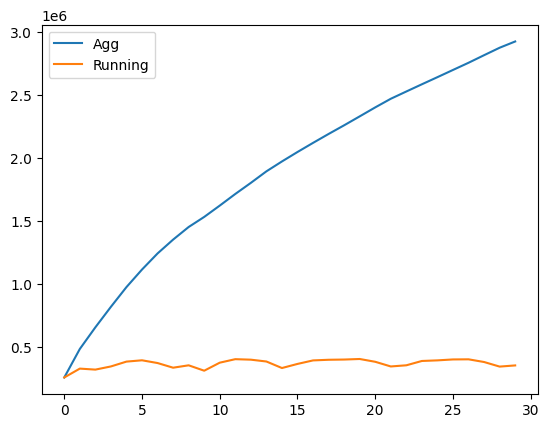

In [8]:
axis = [i for i in range(len(aggregated_shapes))]
plt.plot(axis, aggregated_shapes, label="Agg")
plt.plot(axis, running_shapes, label="Running")
plt.legend()
plt.show()

In [30]:
combined_df = combined_df.groupby(['origin', 'destination']).size().reset_index().rename(columns={0:'count'})
combined_df['count'].unique()

array([2, 1])

In [5]:
aggregated_fdf.to_csv('./../data/processed/aggregated_fdf.csv', index=False)